In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5ff17c6f54fd23191499c7017d6366538fcc35b61d0225390f78827c662577ddcc8d5d64ddf58c68c56d6ad68e5721930a5b7a5803b0bee173'

In [2]:
import aocd
from aocd.models import Puzzle
day = 14
year = 2023
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [202]:
import matplotlib.pyplot as plt
import numpy as np
from functools import cache

In [4]:
test_data = """O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#....
"""
data_test = test_data.splitlines()

In [5]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(100,
 ['O........O..#...O...#OO..O.##..#.O....O#..#..O..#.O....#.....O.O.O..#OO#.....O#O..#.#.#O....O...#.O.',
  '...#....O.O...#..O....#O.....#..#O.O.....O.......#.O...O.O.#O.#..O#.#O..O##...#.OO.##...#O#.O..O###.',
  'O.......O...OO.....O...#..O#.##......O.O.O...O..##..#.O...O...O###O.#.OO.#....#O.........O.##...O#..',
  '.##.O.........O###...#.#......#.#...O.....OO#..#......#..OO.O.OO.O#OOO....O..............O.......O#O',
  '#......#OO#O...O#.O..#.#O..........O.............OOO.##..#....O..OO......OO.....OO.OO...O.......###.',
  '.O...#O#......OOO.....#OO.O.OO..O....#.#..#.O.......#O..O....OO....O..O.#.O.####.O...O..O....OOO#.OO',
  '...#.O......#...##O.......O.#.#..##......#O.O.OO.OO.....#OO#....OOO.....O...#..OOO..O.....O.O.#..O##',
  '##.....O##.O#.O###O#O..........#...O.O.O.#..OO....O#O.##.O......O.OO.O..#......#...#.#O..O#....#...O',
  '.OO........#..O.#O.O..O.....O...#O..OO.#O...O.#....O.O....#O.#O..O......O....#..##.O....##O..#O.O.O.',
  '.O.O.OO..........OOO##O....#.#.##OO#O

In [206]:
def parse(data):
    static = set()
    mobile = set()
    pos = complex(0)
    for line in data:
        for c in line:
            if c == 'O':
                mobile.add(pos)
            elif c == '#':
                static.add(pos)
            pos += 1
        maxX = int(pos.real)
        pos -= pos.real
        pos -= 1j
    maxY = - int(pos.imag)
    return mobile, static, maxY

def move(mobile, static, direction):
    new_mobile = set()
    maxX = max([c.real for c in static])
    maxY = max([-c.imag for c in static])
    def inside(pos):
        if pos.real < 0 or pos.imag > 0:
            return False
        if pos.real > maxX or pos.imag < -maxY:
            return False
        return True
    
    changes = False
    sortkey = lambda r: (r * direction).real
    if direction.real != 0:
        sortkey = lambda r: -(r * direction).real
    for rock in sorted(mobile, key=sortkey ):
        new_pos = rock + direction
        if new_pos not in new_mobile and new_pos not in static and inside(new_pos):
            changes = True
            new_mobile.add(new_pos)
        else:
            new_mobile.add(rock)
    return new_mobile, changes

def cycle(mobile, static):
    for direction in [1j, -1, -1j, 1]:
        while True:
            mobile, changes = move(mobile, static, direction)
            if not changes:
                break
    return mobile

def visualize(mobile, static):
    MX = int(max([c.real for c in static]))
    MY = int(max([-c.imag for c in static]))
    field = np.zeros((MY+1, MX+1))
    for pos in mobile:
        x = int(pos.real)
        y = -int(pos.imag)
        field[y, x] = 1
    for pos in static:
        x = int(pos.real)
        y = -int(pos.imag)
        field[y, x] = 2
    # field[MY, MX] = 10
    plt.imshow(field)    
    
def load(mobile, maxY):
    res = 0
    for pos in mobile:
        res += maxY + pos.imag
    return int(res)

In [192]:
# mobile, static, maxY = parse(data_test)
mobile, static, maxY = parse(data)

In [193]:
i = 0
while True:
    mobile, changes = move(mobile, static, 1j)
    i += 1
    if not changes:
        break

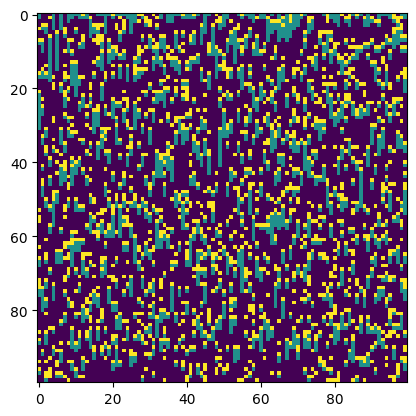

In [194]:
visualize(mobile, static)

In [195]:
res = load(mobile, maxY)
res

110779

In [166]:
puzzle.answer_a = res

That's the right answer!  You are one gold star closer to restoring snow operations. [Continue to Part Two]


In [167]:
# Part 2

In [240]:
# mobile, static, maxY = parse(data_test)
mobile, static, maxY = parse(data)

160 77


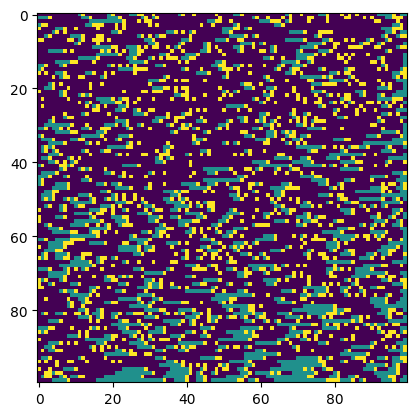

In [241]:
seen = dict()
i = 0
period = 0
N_spins = 1000000000
while i<N_spins:
    i += 1
    mobile = cycle(mobile, static)
    if not period:
        sorted_mobile = tuple(sorted(mobile, key=lambda c: (c.imag, c.real) ))
        if sorted_mobile in seen:
            period = i - seen[sorted_mobile]
            print(i, period)
    else:
        i += ((N_spins - i) // period) * period
    seen[sorted_mobile] = i
visualize(mobile, static)

In [242]:
res = load(mobile, maxY)
res

86069

In [243]:
puzzle.answer_b = res

That's the right answer!  You are one gold star closer to restoring snow operations.You have completed Day 14! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [261]:
period

77

In [268]:
(1000) % 77

76

In [269]:
(1_000_000_000) % 77

76